In [5]:
# #place to pip install
# %pip install pandas 
# %pip install numpy
# %pip install seaborn
# %pip install matplotlib 
# %pip install scikit-learn
# # command for checking packages you installed etc.
# !conda list

# # run this to ensure  running within conda environment
# import sys 
# sys.executable

In [6]:
#imported libraries
import pandas as pd
import numpy as np
from uwb_dataset import import_from_files
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [7]:
dataset = import_from_files('../dataset/')
#load dataset from uwb script provided
df = pd.DataFrame(dataset)
print(f"Dataset shape: {df.shape}")


Processing file: ../dataset/uwb_dataset_part1.csv
Successfully loaded data from ../dataset/uwb_dataset_part1.csv
Processing file: ../dataset/uwb_dataset_part2.csv
Successfully loaded data from ../dataset/uwb_dataset_part2.csv
Processing file: ../dataset/uwb_dataset_part3.csv
Successfully loaded data from ../dataset/uwb_dataset_part3.csv
Processing file: ../dataset/uwb_dataset_part4.csv
Successfully loaded data from ../dataset/uwb_dataset_part4.csv
Processing file: ../dataset/uwb_dataset_part5.csv
Successfully loaded data from ../dataset/uwb_dataset_part5.csv
Processing file: ../dataset/uwb_dataset_part6.csv
Successfully loaded data from ../dataset/uwb_dataset_part6.csv
Processing file: ../dataset/uwb_dataset_part7.csv
Successfully loaded data from ../dataset/uwb_dataset_part7.csv
Successfully processed 7 files
Dataset shape: (42000, 1031)
Dataset shape: (42000, 1031)


In [8]:
#add in the attributes names to the combined dataset from all the csv files and stuff
column_names = [
    'NLOS',              # 1 if NLOS, 0 if LOS
    'measured_range',    # Measured range (time of flight)
    'RXPACC',           # received RX preamble symbols
    'FP_AMP1',          # first path amplitude - part1
    'FP_AMP2',          # first path amplitude - part2
    'FP_AMP3',          # first path amplitude - part3
    'STDEV_NOISE',      # standard deviation of noise
    'CIR_PWR',         # total channel impulse response power
    'MAX_NOISE',        # maximum value of noise
    'FP_IDX',          # first path index
    'CH',              # channel number
    'FRAME_LEN',       # length of frame
    'PREAM_LEN',       # preamble length
    'BITRATE',         # bitrate
    'PRFR'             # pulse repetition frequency rate in MHz
]

#add CIR column names (1016 samples)
cir_columns = [f'CIR_{i}' for i in range(1016)]
column_names.extend(cir_columns)

# rename DataFrame columns
df.columns = column_names

# find dtypes for each attribute
print("=== Data Types Analysis ===")
print("\nFeature Data Types:")

print(df.dtypes.head(15))

print("\n\nFeature describe:")
print(df.describe())

#see if total shape matches
print("\n\n Shape of total combined dataset:")
print("DataFrame shape:", df.shape)

df.head()
 


=== Data Types Analysis ===

Feature Data Types:
NLOS              float64
measured_range    float64
RXPACC            float64
FP_AMP1           float64
FP_AMP2           float64
FP_AMP3           float64
STDEV_NOISE       float64
CIR_PWR           float64
MAX_NOISE         float64
FP_IDX            float64
CH                float64
FRAME_LEN         float64
PREAM_LEN         float64
BITRATE           float64
PRFR              float64
dtype: object


Feature describe:
               NLOS  measured_range        RXPACC       FP_AMP1       FP_AMP2  \
count  42000.000000    42000.000000  42000.000000  42000.000000  42000.000000   
mean       0.500000        3.831519    745.654167   8127.521905  11425.259524   
std        0.500006        2.355976      4.505024   5393.330697   6235.434769   
min        0.000000        0.000000    707.000000      7.000000     63.000000   
25%        0.000000        1.810000    744.000000   3573.750000   5322.750000   
50%        0.500000        3.480000    74

,NLOS,measured_range,RXPACC,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,FP_IDX,...,CIR_1006,CIR_1007,CIR_1008,CIR_1009,CIR_1010,CIR_1011,CIR_1012,CIR_1013,CIR_1014,CIR_1015
0,0.0,3.90,745.0,18712.0,10250.0,11576.0,64.0,11855.0,967.0,611.0,...,279.0,458.0,183.0,158.0,198.0,87.0,296.0,505.0,307.0,0.0
1,0.0,0.66,749.0,11239.0,6313.0,4712.0,64.0,18968.0,1133.0,447.0,...,144.0,334.0,290.0,228.0,187.0,213.0,202.0,89.0,103.0,0.0
2,1.0,7.86,746.0,4355.0,5240.0,3478.0,60.0,14699.0,894.0,723.0,...,32.0,373.0,224.0,174.0,124.0,329.0,207.0,96.0,218.0,0.0
3,1.0,3.48,750.0,8502.0,8416.0,5890.0,76.0,8748.0,1127.0,1024.0,...,252.0,173.0,198.0,160.0,434.0,397.0,290.0,155.0,342.0,256.0
4,0.0,1.19,746.0,17845.0,18095.0,12058.0,68.0,11380.0,1744.0,276.0,...,154.0,209.0,242.0,296.0,87.0,178.0,314.0,247.0,292.0,256.0


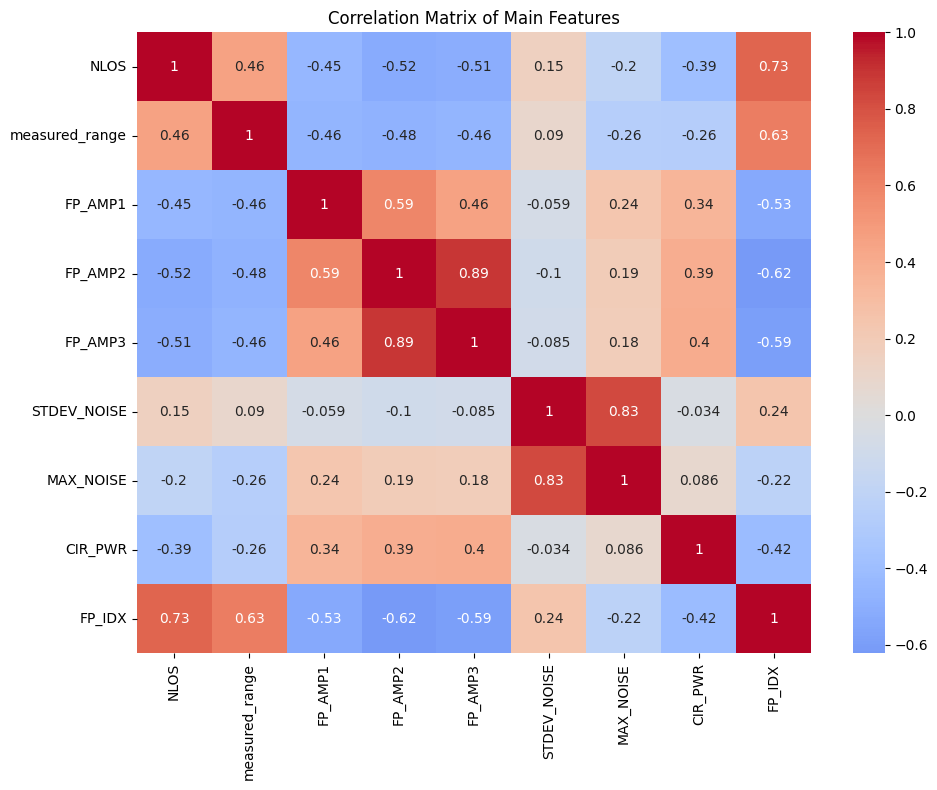

In [9]:
# correlation matrix visualisation (without CIR 1016 columns )

main_features = ['NLOS', 'measured_range', 'FP_AMP1', 'FP_AMP2', 'FP_AMP3', 
                 'STDEV_NOISE', 'MAX_NOISE', 'CIR_PWR', 'FP_IDX']

# Create correlation matrix for main features
plt.figure(figsize=(10, 8))
correlation = df[main_features].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Main Features')
plt.tight_layout()
plt.show()

In [10]:
#distribution plot
cir_columns = [col for col in df.columns if 'CIR_' in col]

# Calculate summary features
df['CIR_mean'] = df[cir_columns].mean(axis=1)
df['CIR_std'] = df[cir_columns].std(axis=1)
df['CIR_max'] = df[cir_columns].max(axis=1)
df['CIR_energy'] = (df[cir_columns]**2).sum(axis=1)

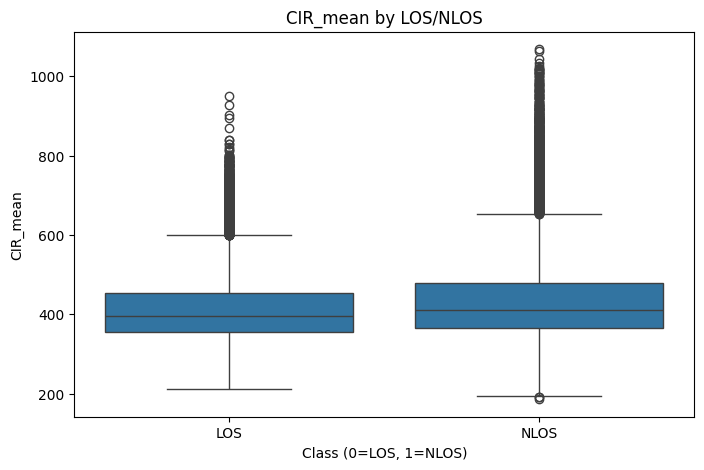

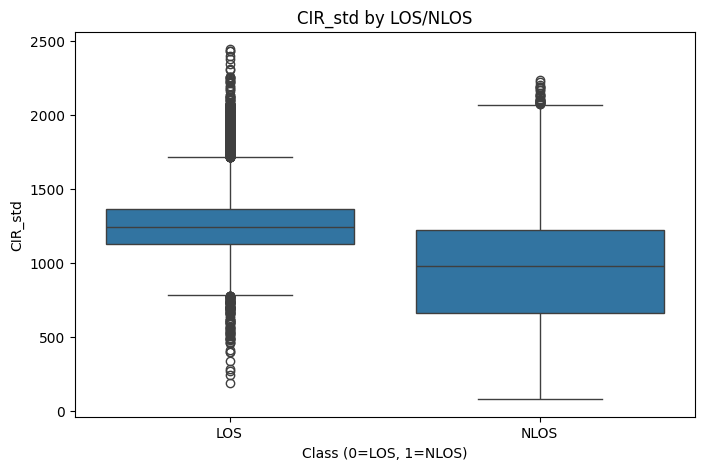

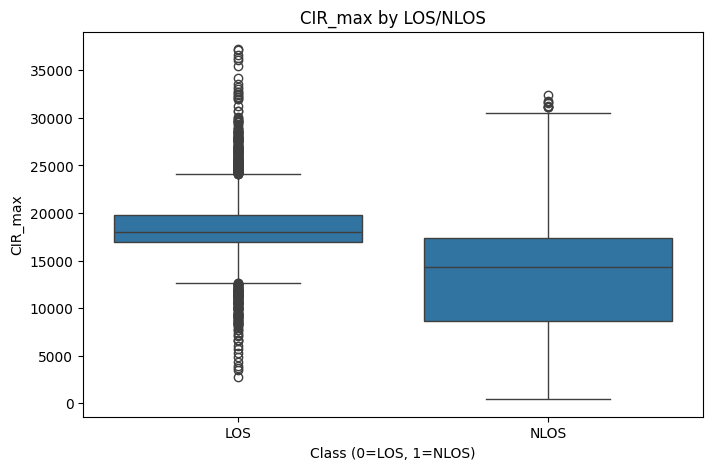

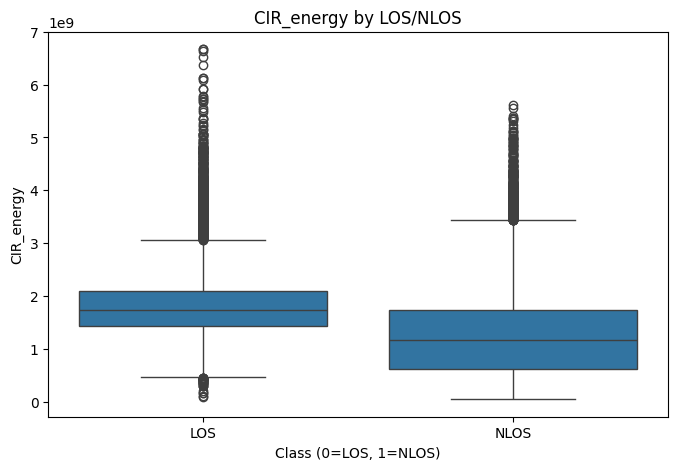

In [16]:
summary_features = ['CIR_mean', 'CIR_std', 'CIR_max', 'CIR_energy']

for feature in summary_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='NLOS', y=feature)
    plt.title(f'{feature} by LOS/NLOS')
    plt.xlabel('Class (0=LOS, 1=NLOS)')
    plt.ylabel(feature)
    plt.xticks([0, 1], ['LOS', 'NLOS'])
    plt.show()

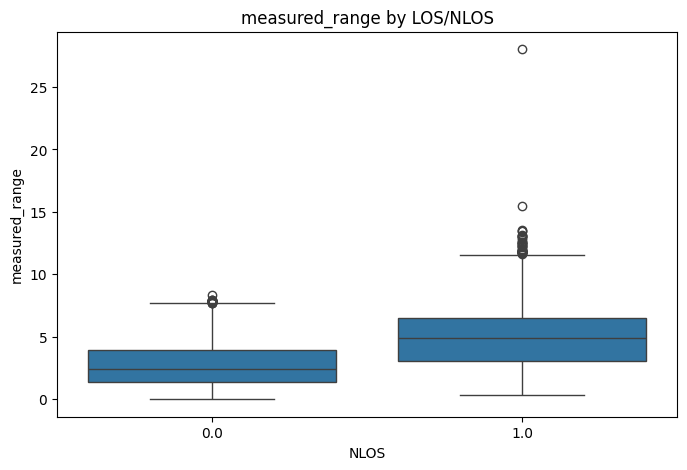

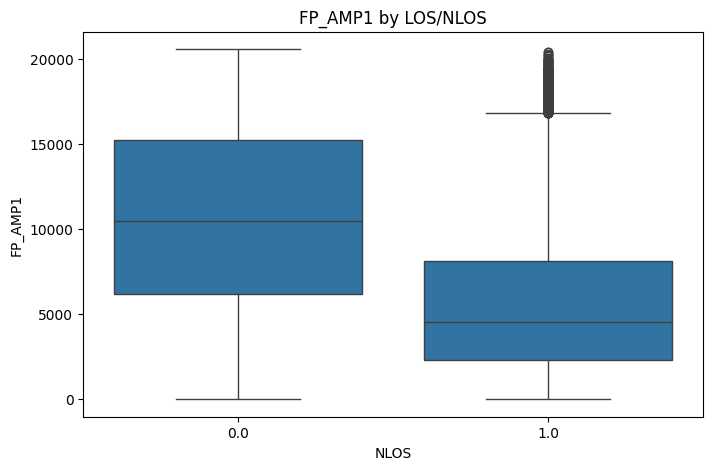

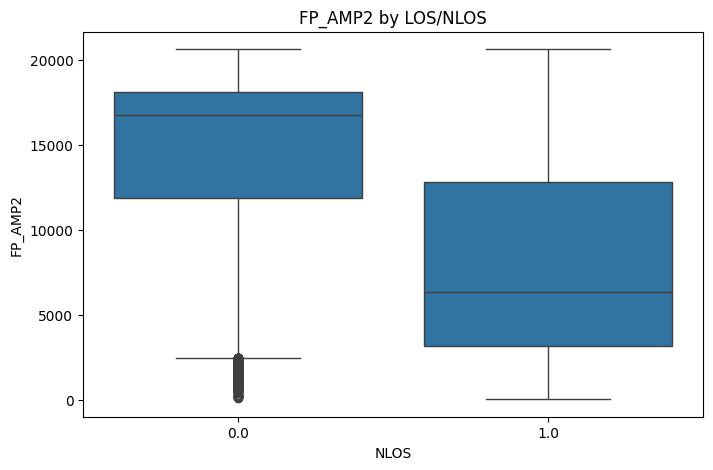

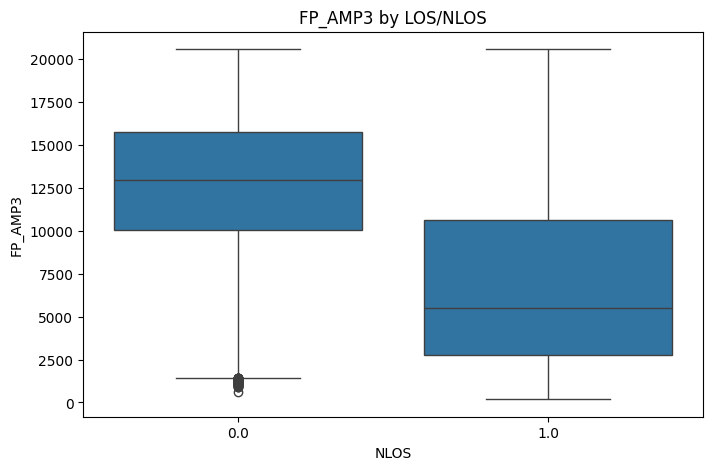

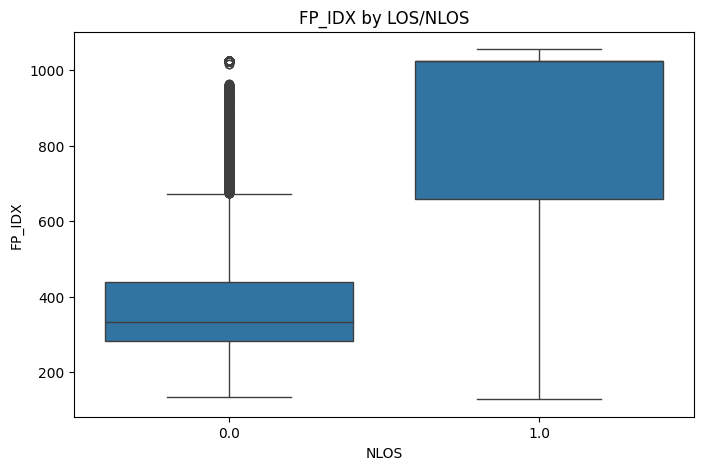

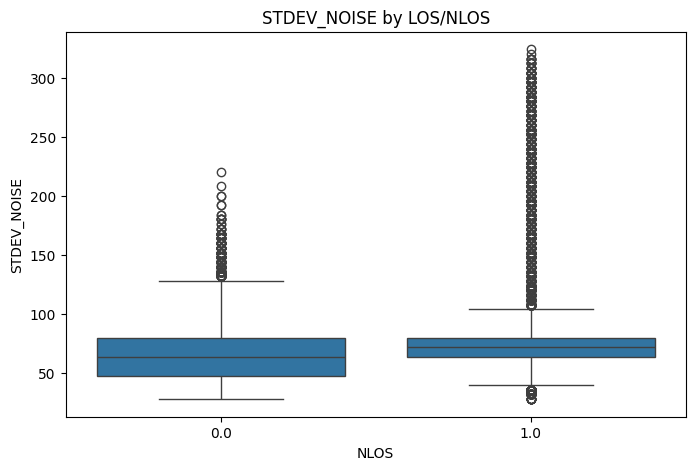

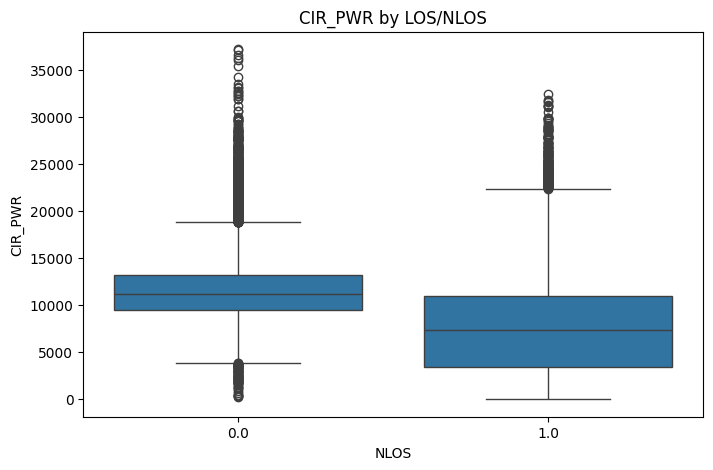

In [14]:
other_features = ['measured_range', 'FP_AMP1', 'FP_AMP2', 'FP_AMP3', 
                  'FP_IDX', 'STDEV_NOISE', 'CIR_PWR']

for feature in other_features:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x='NLOS', y=feature)
    plt.title(f'{feature} by LOS/NLOS')
    plt.show()
